In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("cc_merged_0412.csv",sep='\t')

In [3]:
data.head(20)

,Unnamed: 0,index,year,caseid,opinion_type,judge_name,decision,date,Author,Affirmed,...,suffix,month_3,length_3m,month_6,length_6m,month_3m_b,month_3_b,length_3m_dif,txt,x_dem_p
0,0,2304,1993,X35807,contentMajOp,PER CURIAM,affirmed,1993-08-04,NaN,1.0,...,,1993-11-04,49.758998,1994-02-04,49.603455,1993-05-04,1993-05-04,-1.099144,per curiam: charo appeals his sentence for co...,0.292902
1,1,2796,1992,X3AD9D,contentMajOp,LOGAN,affirmed,1992-11-13,LOGAN,1.0,...,JR.,1993-02-13,52.334119,1993-05-13,51.257239,1992-08-13,1992-08-13,1.663181,"logan , circuit judge. the only issue in this...",0.328425
2,2,2805,1992,X3ADTB,contentMajOp,LOGAN,reversed,1992-12-29,LOGAN,0.0,...,JR.,1993-03-29,50.282495,1993-06-29,51.134191,1992-09-29,1992-09-29,-3.563471,"logan , circuit judge. defendant bernard d. r...",0.328425
3,3,2814,1997,X37GPR,contentMajOp,JOHN C,affirmed,1997-02-11,PORFILIO,1.0,...,JR.,1997-05-11,51.570342,1997-08-11,51.983779,1996-11-11,1996-11-11,0.760434,"john c. porfilio , circuit judge. defendant b...",0.360773
4,4,2816,1999,X4QAM7,contentMajOp,HOLLOWAY,affirmed,1999-01-04,HOLLOWAY,1.0,...,JR.,1999-04-04,59.568882,1999-07-04,59.854130,1998-10-04,1998-10-04,-0.630426,"holloway , circuit judge. mr. unser brings th...",0.411135
5,5,2817,1998,XN5ACRQNB5G0,contentMajOp,JOHN C,affirmed,1998-02-23,PORFILIO,1.0,...,JR.,1998-05-23,63.292860,1998-08-23,61.762051,1997-11-23,1997-11-23,3.591201,"john c. porfilio , circuit judge. these three...",0.399229
6,6,2819,1991,X57EQB,contentMajOp,JOHN P,reversed,1991-12-17,MOORE,0.0,...,JR.,1992-03-17,50.717301,1992-06-17,50.744294,1991-09-17,1991-09-17,1.751541,"john p. moore , circuit judge. james l. norma...",0.350113
7,7,2820,1991,XAC38F,contentMajOp,BRORBY,affirmed,1991-12-31,BRORBY,1.0,...,JR.,1992-03-31,49.808413,1992-06-30,50.642475,1991-09-30,1991-09-30,0.303059,"brorby , circuit judge. defendant juan dozal-...",0.350113
8,8,2821,1995,X4NT3Q,contentMajOp,HOLLOWAY,affirmed,1995-10-18,HOLLOWAY,1.0,...,JR.,1996-01-18,50.519827,1996-04-18,51.128395,1995-07-18,1995-07-18,-0.039012,"holloway , circuit judge. petitioner-appellan...",0.341123
9,9,2822,2000,X3FBF1,contentMajOp,TACHA,affirmed,2000-04-04,TACHA,1.0,...,JR.,2000-07-04,59.489909,2000-10-04,59.785273,2000-01-04,2000-01-04,-1.213819,"tacha , circuit judge. defendant tony smith a...",0.440144


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8434 entries, 0 to 8433
Columns: 298 entries, Unnamed: 0 to x_dem_p
dtypes: float64(211), int64(61), object(26)
memory usage: 19.2+ MB


In [5]:
data.columns.values

array(['Unnamed: 0', 'index', 'year', 'caseid', 'opinion_type',
       'judge_name', 'decision', 'date', 'Author', 'Affirmed',
       'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated',
       'VacatedInPart', 'Circuit', 'judgeid1', 'judgeid2', 'judgeid3',
       'x_dem_x', 'x_republican_x', 'x_instate_ba_x', 'x_elev_x',
       'x_unity_x', 'x_aba_x', 'x_crossa_x', 'x_pfedjdge_x',
       'x_pindreg1_x', 'x_plawprof_x', 'x_pscab_x', 'x_pcab_x', 'x_pusa_x',
       'x_pssenate_x', 'x_paag_x', 'x_psp_x', 'x_pslc_x', 'x_pssc_x',
       'x_pshouse_x', 'x_psg_x', 'x_psgo_x', 'x_psenate_x', 'x_psatty_x',
       'x_pprivate_x', 'x_pmayor_x', 'x_plocct_x', 'x_phouse_x',
       'x_pgov_x', 'x_pda_x', 'x_pcc_x', 'x_pccoun_x', 'x_pausa_x',
       'x_pasatty_x', 'x_pag_x', 'x_pada_x', 'x_pgovt_x', 'x_llm_sjd_x',
       'x_protestant_x', 'x_evangelical_x', 'x_mainline_x',
       'x_noreligion_x', 'x_catholic_x', 'x_jewish_x', 'x_black_x',
       'x_nonwhite_x', 'x_female_x', 'x_jd_public_x', '

In [6]:
# affrimed,affimed, ..., other, + txt to predict length_3m

In [7]:
data_use = data[['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','txt','length_3m_dif']]

In [8]:
data_use.head(10)

,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,txt,length_3m_dif
0,1.0,0.0,0.0,0.0,0.0,0.0,per curiam: charo appeals his sentence for co...,-1.099144
1,1.0,0.0,0.0,0.0,0.0,0.0,"logan , circuit judge. the only issue in this...",1.663181
2,0.0,0.0,1.0,0.0,0.0,0.0,"logan , circuit judge. defendant bernard d. r...",-3.563471
3,1.0,0.0,0.0,0.0,0.0,0.0,"john c. porfilio , circuit judge. defendant b...",0.760434
4,1.0,0.0,0.0,0.0,0.0,0.0,"holloway , circuit judge. mr. unser brings th...",-0.630426
5,1.0,0.0,0.0,0.0,0.0,0.0,"john c. porfilio , circuit judge. these three...",3.591201
6,0.0,0.0,0.0,0.0,1.0,0.0,"john p. moore , circuit judge. james l. norma...",1.751541
7,1.0,0.0,0.0,0.0,0.0,0.0,"brorby , circuit judge. defendant juan dozal-...",0.303059
8,1.0,0.0,0.0,0.0,0.0,0.0,"holloway , circuit judge. petitioner-appellan...",-0.039012
9,1.0,0.0,0.0,0.0,0.0,0.0,"tacha , circuit judge. defendant tony smith a...",-1.213819


In [9]:
data_use['txt'].iloc[0]

' per curiam: charo appeals his sentence for conspiracy to possess with intent to distribute cocaine and money laundering. he maintains that the district court erred in refusing to grant him a two-level reduction for acceptance of responsibility under u.s.s.g. 3e1.1(a) . he contends that he manifested acceptance of responsibility by admitting his involvement in the offense, showing remorse, and cooperating with law enforcement officials. the government responds that the district court\'s finding that charo had not accepted responsibility for the offense conduct was not clearly erroneous. the sentencing court\'s determination that a defendant is not entitled to a reduction for acceptance of responsibility is entitled to great deference and will not be overturned unless it is clearly erroneous. united states v. spraggins , 868 f.2d 1541, 1543 (11th cir.1989). section 3e1.1(a) requires a sentencing court to reduce the offense level by two levels "if the defendant clearly demonstrates a re

In [10]:
#create bin:
#0: decrease
#1: same
#2: increase
def create_bin(row):
    if row['length_3m_dif']<-0.2:
        return 0
    elif row['length_3m_dif']>0.2:
        return 2
    else:
        return 1

In [11]:
data_use['bin']=data_use.apply(create_bin,axis=1)

/share/apps/python3/3.5.3/intel/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
data_use.head()

,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,txt,length_3m_dif,bin
0,1.0,0.0,0.0,0.0,0.0,0.0,per curiam: charo appeals his sentence for co...,-1.099144,0
1,1.0,0.0,0.0,0.0,0.0,0.0,"logan , circuit judge. the only issue in this...",1.663181,2
2,0.0,0.0,1.0,0.0,0.0,0.0,"logan , circuit judge. defendant bernard d. r...",-3.563471,0
3,1.0,0.0,0.0,0.0,0.0,0.0,"john c. porfilio , circuit judge. defendant b...",0.760434,2
4,1.0,0.0,0.0,0.0,0.0,0.0,"holloway , circuit judge. mr. unser brings th...",-0.630426,0


In [13]:
#data1_attemp = data_use[['txt','length_3m_dif']]

In [14]:
from sklearn.cross_validation import train_test_split
from numpy.random import RandomState

RS1 = RandomState(1)
train_data = data_use.sample(frac = 0.75, random_state = 200)
test_data = data_use.drop(train_data.index)

x_train = train_data['txt']
x_test = test_data['txt']
Y_train = train_data['length_3m_dif']
Y_test = test_data['length_3m_dif']

print(train_data.shape)
print(test_data.shape)

(6326, 9)
(2108, 9)


/share/apps/python3/3.5.3/intel/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer_1gram = CountVectorizer(stop_words = 'english', binary = False)
count_vectorizer_2gram = CountVectorizer(stop_words = 'english', ngram_range = (1,2) , binary = False)
tfid_vectorizer_1gram = TfidfVectorizer(stop_words = 'english', binary = False)
tfid_vectorizer_2gram = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), binary = False)

count_vectorizer_1gram.fit(x_train)
count_vectorizer_2gram.fit(x_train)

tfid_vectorizer_1gram.fit(x_train)
tfid_vectorizer_2gram.fit(x_train)


#count_vectorizer
count_train_1gram = count_vectorizer_1gram.transform(x_train)
count_test_1gram = count_vectorizer_1gram.transform(x_test)

count_train_2gram = count_vectorizer_2gram.transform(x_train)
count_test_2gram = count_vectorizer_2gram.transform(x_test)

#tfid_vectorizer
tf_train_1gram = tfid_vectorizer_1gram.transform(x_train)
tf_test_1gram = tfid_vectorizer_1gram.transform(x_test)

tf_train_2gram = tfid_vectorizer_2gram.transform(x_train)
tf_test_2gram = tfid_vectorizer_2gram.transform(x_test)

CPU times: user 3min 19s, sys: 2.83 s, total: 3min 21s
Wall time: 3min 21s


In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
#count 1 gram:

In [18]:
lr_base_count_1gram = linear_model.LinearRegression()
lr_base_count_1gram.fit(count_train_1gram, Y_train)
lr_base_count_1gram_pred = lr_base_count_1gram.predict(count_test_1gram)
count_1gram_base_mae = mean_absolute_error(Y_test, lr_base_count_1gram_pred)

In [19]:
count_1gram_base_mae

2.69964025579824

In [20]:
count_1gram_base_mae_r2 = r2_score(Y_test, lr_base_count_1gram_pred)

In [21]:
count_1gram_base_mae_r2

-2.8035214992717261

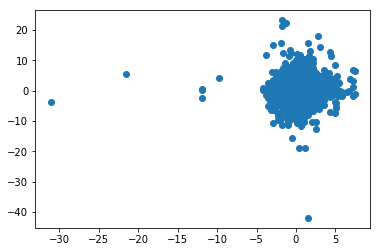

In [22]:
plt.scatter(Y_test,lr_base_count_1gram_pred)
plt.show()

In [23]:
#count 2 gram:

In [24]:
lr_base_count_2gram = linear_model.LinearRegression()
lr_base_count_2gram.fit(count_train_2gram, Y_train)
lr_base_count_2gram_pred = lr_base_count_2gram.predict(count_test_2gram)
count_2gram_base_mae = mean_absolute_error(Y_test, lr_base_count_2gram_pred)

In [25]:
count_2gram_base_mae

1.7585600238429082

In [26]:
count_2gram_base_mae_r2 = r2_score(Y_test, lr_base_count_2gram_pred)

In [27]:
count_2gram_base_mae_r2

-0.53133179890467863

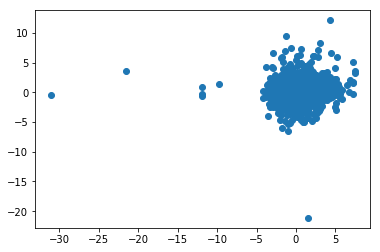

In [28]:
plt.scatter(Y_test,lr_base_count_2gram_pred)
plt.show()

In [29]:
# tfidf 1 gram:

In [30]:
lr_base_tfidf_1gram = linear_model.LinearRegression()
lr_base_tfidf_1gram.fit(tf_train_1gram, Y_train)
lr_base_tfidf_1gram_pred = lr_base_tfidf_1gram.predict(tf_test_1gram)
tfidf_1gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_1gram_pred)

In [31]:
tfidf_1gram_base_mae

1.7085882973015794

In [32]:
tfidf_1gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_1gram_pred)

In [33]:
tfidf_1gram_base_mae_r2

-0.37162225423885853

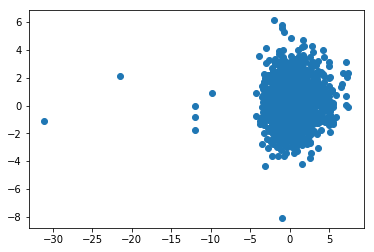

In [34]:
plt.scatter(Y_test,lr_base_tfidf_1gram_pred)
plt.show()

In [35]:
# tfidf 2 gram:

In [36]:
lr_base_tfidf_2gram = linear_model.LinearRegression()
lr_base_tfidf_2gram.fit(tf_train_2gram, Y_train)
lr_base_tfidf_2gram_pred = lr_base_tfidf_2gram.predict(tf_test_2gram)
tfidf_2gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_2gram_pred)

In [37]:
tfidf_2gram_base_mae

1.4516721052128747

In [38]:
tfidf_2gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_2gram_pred)

In [39]:
tfidf_2gram_base_mae_r2

-0.072263646659945113

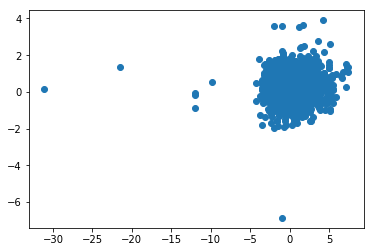

In [40]:
plt.scatter(Y_test,lr_base_tfidf_2gram_pred)
plt.show()

In [ ]:
#using tfidf vectorizer with 2 gram. 
#try randomforest regressor, decision tree regressor, svm regressor, 

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [54]:
%%time
rfr = RandomForestRegressor()
rfr.fit(tf_train_2gram, Y_train)

CPU times: user 1h 13min 12s, sys: 3.78 s, total: 1h 13min 16s
Wall time: 1h 13min 16s


In [60]:
rfr_base_tfidf_2gram_pred = rfr.predict(tf_test_2gram)
rfr_tfidf_2gram_base_mse = mean_squared_error(Y_test, rfr_base_tfidf_2gram_pred)
rfr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, rfr_base_tfidf_2gram_pred)

In [62]:
print('mean squared error is {}'.format(rfr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(rfr_tfidf_2gram_base_mae))

mean squared error is 4.096154207450842
mean absolute error is 1.4104636246745632


In [63]:
%%time
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(tf_train_2gram, Y_train)

CPU times: user 13min 8s, sys: 765 ms, total: 13min 9s
Wall time: 13min 9s


In [64]:
dtr_base_tfidf_2gram_pred = dtr.predict(tf_test_2gram)
dtr_tfidf_2gram_base_mse = mean_squared_error(Y_test, dtr_base_tfidf_2gram_pred)
dtr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, dtr_base_tfidf_2gram_pred)

In [65]:
print('mean squared error is {}'.format(dtr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(dtr_tfidf_2gram_base_mae))

mean squared error is 7.100525580809923
mean absolute error is 1.9686191620589413


In [43]:
%%time
svrr = SVR(C=1.0, epsilon=0.2)
svrr.fit(tf_train_2gram, Y_train)

CPU times: user 6min, sys: 499 ms, total: 6min 1s
Wall time: 6min 1s


In [44]:
svrr_base_tfidf_2gram_pred = svrr.predict(tf_test_2gram)
svrr_tfidf_2gram_base_mse = mean_squared_error(Y_test, svrr_base_tfidf_2gram_pred)
svrr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, svrr_base_tfidf_2gram_pred)

In [45]:
print('mean squared error is {}'.format(svrr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(svrr_tfidf_2gram_base_mae))

mean squared error is 4.011354588876976
mean absolute error is 1.378889769516743


In [46]:
%%time 
gbr = GradientBoostingRegressor()
gbr.fit(tf_train_2gram, Y_train)

CPU times: user 11min 25s, sys: 2.36 s, total: 11min 27s
Wall time: 11min 27s


In [47]:
#gradient boosting accept sparse matrix as input in "fit" method, but currently does not accept sparse matrix for "predict" method

In [48]:
gbr_base_tfidf_2gram_pred = gbr.predict(tf_test_2gram.todense())
gbr_tfidf_2gram_base_mse = mean_squared_error(Y_test, gbr_base_tfidf_2gram_pred)
gbr_tfidf_2gram_base_mae = mean_absolute_error(Y_test, gbr_base_tfidf_2gram_pred)

In [49]:
print('mean squared error is {}'.format(gbr_tfidf_2gram_base_mse))
print('mean absolute error is {}'.format(gbr_tfidf_2gram_base_mae))

mean squared error is 3.95995212045273
mean absolute error is 1.373931526159648


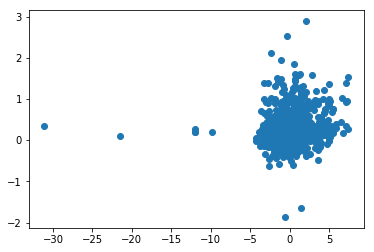

In [50]:
plt.scatter(Y_test,gbr_base_tfidf_2gram_pred)
plt.show()

In [51]:
# If we use all the text feature, the number of features are substaintially larger than the number of data we have
# this causes two main problem: 1. making the model prone to overfitting
#                               2. extremely costly to tune a model 

In [52]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer_1gram = CountVectorizer(stop_words = 'english', binary = False, max_features= 50)
count_vectorizer_2gram = CountVectorizer(stop_words = 'english', ngram_range = (1,2) , binary = False, max_features= 50)
tfid_vectorizer_1gram = TfidfVectorizer(stop_words = 'english', binary = False, max_features= 50)
tfid_vectorizer_2gram = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), binary = False,max_features= 50)

count_vectorizer_1gram.fit(x_train)
count_vectorizer_2gram.fit(x_train)

tfid_vectorizer_1gram.fit(x_train)
tfid_vectorizer_2gram.fit(x_train)


#count_vectorizer
count_train_1gram = count_vectorizer_1gram.transform(x_train)
count_test_1gram = count_vectorizer_1gram.transform(x_test)

count_train_2gram = count_vectorizer_2gram.transform(x_train)
count_test_2gram = count_vectorizer_2gram.transform(x_test)

#tfid_vectorizer
tf_train_1gram = tfid_vectorizer_1gram.transform(x_train)
tf_test_1gram = tfid_vectorizer_1gram.transform(x_test)

tf_train_2gram = tfid_vectorizer_2gram.transform(x_train)
tf_test_2gram = tfid_vectorizer_2gram.transform(x_test)

CPU times: user 3min 2s, sys: 1.93 s, total: 3min 4s
Wall time: 3min 4s


In [53]:
#doing cross validation for gradient boosting regressor

In [54]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(tf_train_2gram.todense(), Y_train)


CPU times: user 2min 28s, sys: 49 ms, total: 2min 28s
Wall time: 2min 28s


In [55]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}

In [56]:
gbr_opt = GradientBoostingRegressor(max_depth= 2, max_features='sqrt', n_estimators= 10)
gbr_opt.fit(tf_train_2gram, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [57]:
gbr_opt_tfidf_2gram_pred = gbr_opt.predict(tf_test_2gram.todense())
gbr_opt_tfidf_2gram_mse = mean_squared_error(Y_test, gbr_opt_tfidf_2gram_pred)
gbr_opt_tfidf_2gram_mae = mean_absolute_error(Y_test, gbr_opt_tfidf_2gram_pred)

In [58]:
print('mean squared error is {}'.format(gbr_opt_tfidf_2gram_mse))
print('mean absolute error is {}'.format(gbr_opt_tfidf_2gram_mae))

mean squared error is 4.015572106250717
mean absolute error is 1.3790601814139116


In [ ]:
# we will use word embedding to featurize the text and predict sentencing length

In [ ]:
#use pretrain word embedding:
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [ ]:
model = loadGloveModel("glove.42B.300d.txt")

In [ ]:
print(model['obama'])